In [ ]:
# fn으로 해야 그 줄에서 home end가 가능함

## Tensors  
Tensors are a specialized data structure that are very similar to `arrays` and `matrices`  
we use these Tensors to encode the inputs and outputs of a model, as well as the model's parameters.  
  
`Tensors` are similar to numpy's ndarrays, except that..  
tensors `can run on GPUs or other hardware accelerators`  

In fact, tensors and numpy arrays can often share the same underlying memory, eliminating the need to copy data..   
Tensors -> Optimized for automatic differentiation  

In [1]:
import torch
import numpy as np

In [2]:
data = [[1, 2], [3, 4]]# 파이썬 내장 리스트
x_data = torch.tensor(data) # tensor([[1, 2], [3, 4]])
print(x_data)

tensor([[1, 2],
        [3, 4]])


In [7]:
np_array = np.array(data) # array([[1, 2], [3, 4]])
x_np = torch.from_numpy(np_array) # tensor([[1, 2], [3, 4]])
x_np_1 = torch.tensor(np_array)# tensor([[1, 2], [3, 4]])
# you can variate using tensor by using torch.tensor or torch.from_numpy
print(x_np, "\n" , x_np_1)
print(np.array(x_np),type(np.array(x_np)))
print(torch.from_numpy(np_array))

tensor([[1, 2],
        [3, 4]]) 
 tensor([[1, 2],
        [3, 4]])
[[1 2]
 [3 4]] <class 'numpy.ndarray'>
tensor([[1, 2],
        [3, 4]])


## torch.from_numpy() 와 torch.tensor()의 차이!  
![from_numpy와_tensor의차이](https://github.com/SHEWANTSME/NOVEMBER/assets/91362178/ebebc306-5ff7-49e9-b400-1908d456dbcf)

In [9]:
# 1만 있는 tensor, random한 tensor, 0만 있는 tensor
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
x_ones = torch.ones_like(x_data)
print(f'ones - tensor : \n {x_ones} \n')
x_rand= torch.rand_like(x_data, dtype=torch.float)# override the datatype of x_data, dtype은 float형태
print(f'random - tensor : \n {x_rand} \n')
x_zeros = torch.zeros_like(x_data)
print(f'zeros - tensor : \n {x_zeros} \n')

ones - tensor : 
 tensor([[1, 1],
        [1, 1]]) 

random - tensor : 
 tensor([[0.1121, 0.8381],
        [0.3000, 0.4549]]) 

zeros - tensor : 
 tensor([[0, 0],
        [0, 0]]) 



In [10]:
# 아니면 그냥 shape만 지정한 후에 1, 0, random tensor를 만들어도 됨
shape = (2,3)# 2x3 행렬 + 튜플 형태
# shape에서 (x,y)랑 (x,y,)의 차이는 뭘까? -> 별 차이 없어보임
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)
print(f'random - tensor : \n {rand_tensor} \n')
print(f'ones - tensor : \n {ones_tensor} \n')
print(f'zeros - tensor : \n {zeros_tensor} \n')

random - tensor : 
 tensor([[0.7504, 0.0040, 0.8707],
        [0.8502, 0.4622, 0.3334]]) 

ones - tensor : 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

zeros - tensor : 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 



In [16]:
# dim과 shape의 차이는 뭘까? -> dim은 차원을 의미하고, shape은 행렬의 크기를 의미함
# ex)
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)
print(f'random - tensor : \n {rand_tensor} \n')
print(f'ones - tensor : \n {ones_tensor} \n')
print(f'zeros - tensor : \n {zeros_tensor} \n')

# 2 by 3 행렬이니까 dim은 2겠지?
print(f'random - tensor dim : {rand_tensor.ndim} \n')
print(f'ones - tensor dim : {ones_tensor.ndim} \n')
print(f'zeros - tensor dim : {zeros_tensor.ndim} \n')

# tensor의 shape을 바꿔보자
# reshaped = shape.reshape(3,2) -> 이렇게 하면 안됨,, 왜냐하면 shape은 튜플이고, tuple은 immutable하기 때문이지
reshaped_rand_tensor= torch.reshape(rand_tensor, (3,2))
reshaped_ones_tensor= torch.reshape(ones_tensor, (3,2))
reshaped_zeros_tensor= torch.reshape(zeros_tensor, (3,2))
print(f'random - tensor : \n {reshaped_rand_tensor} \n')
print(f'ones - tensor : \n {reshaped_ones_tensor} \n')
print(f'zeros - tensor : \n {reshaped_zeros_tensor} \n')

# 3 by 2 행렬이니까 dim은 2겠지?
print(f'random - tensor dim : {reshaped_rand_tensor.ndim} \n')
print(f'ones - tensor dim : {reshaped_ones_tensor.ndim} \n')
print(f'zeros - tensor dim : {reshaped_zeros_tensor.ndim} \n')

random - tensor : 
 tensor([[0.4819, 0.5697, 0.9585],
        [0.0919, 0.9896, 0.8758]]) 

ones - tensor : 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

zeros - tensor : 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 

random - tensor dim : 2 

ones - tensor dim : 2 

zeros - tensor dim : 2 

random - tensor : 
 tensor([[0.4819, 0.5697],
        [0.9585, 0.0919],
        [0.9896, 0.8758]]) 

ones - tensor : 
 tensor([[1., 1.],
        [1., 1.],
        [1., 1.]]) 

zeros - tensor : 
 tensor([[0., 0.],
        [0., 0.],
        [0., 0.]]) 

random - tensor dim : 2 

ones - tensor dim : 2 

zeros - tensor dim : 2 



Over 100 tensor operations, including arithmetic, linear algebra, matrix manipulation(transposing, indexing, slicing,, etc..)  
sampling and more are.. -> Find it yourself  

Each of these operations can be run on the GPU  

By default,, tensors are created on the CPU. So,, We need to explicitly move tensors to the GPU using `.to()`  
Keep in mind that.. Copying large tensors across devices can be expensive in terms of time and memory!! 

In [17]:
if torch.cuda.is_available():
    tensor= tensor.to('cuda')# tensor를 gpu로 옮기기 



In [18]:
tensor= torch.ones(4,4)# 4x4 행렬 다 1로 이루어짐
print('First row : ', tensor[0])# tensor[0]은 1x4 행렬이 됨
print('First column : ', tensor[:, 0])# tensor[:, 0]은 4x1 행렬이 됨
print('Last column : ', tensor[..., -1])# tensor[..., -1]은 4x1 행렬이 됨
tensor[:,1] = 0# tensor의 2번째 column을 0으로 바꿈
print(tensor)

First row :  tensor([1., 1., 1., 1.])
First column :  tensor([1., 1., 1., 1.])
Last column :  tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [19]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)# tensor를 3번 반복해서 붙임
# concat을 할 때 dim=0이면 row끼리 붙이고, dim=1이면 column끼리 붙임
t2 = torch.cat([tensor, tensor, tensor], dim=0)# tensor를 3번 반복해서 붙임
print(t1)
print(t2)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [22]:
# matrix multiplication between two tensors
# y1, y2는 모두 같은 결과를 가짐
y1 = tensor @ tensor.T# tensor와 tensor의 transpose를 곱함
y2 = tensor.matmul(tensor.T)# tensor와 tensor의 transpose를 곱함
y3 = torch.rand_like(tensor)# tensor와 tensor의 transpose를 곱함
# rand_like : tensor와 같은 shape의 random한 tensor를 만듦
print(y1)
print(y2)
print(y3)
torch.mul(tensor, tensor.T, out=y3)# tensor와 tensor의 transpose를 곱함

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[0.6516, 0.1110, 0.5502, 0.5791],
        [0.2643, 0.2966, 0.4947, 0.8561],
        [0.3936, 0.8186, 0.3833, 0.3576],
        [0.7398, 0.8456, 0.3811, 0.9850]])


tensor([[1., 0., 1., 1.],
        [0., 0., 0., 0.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [23]:
# element-wise product ->성분 곱 -> 같은 위치에 있는 원소끼리 곱함
z1 = tensor * tensor
z2 = tensor.mul(tensor)
z3 = torch.rand_like(tensor)
print(z1)
print(z2)
print(z3)
torch.mul(tensor, tensor.T, out=z3)# out에 tensor와 tensor의 곱을 넣음
# 여기서는 tensor*tensor를 하나, tensor*tensor.T를 하나값이 같음

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[0.9918, 0.3902, 0.6652, 0.4876],
        [0.4560, 0.4049, 0.4019, 0.2087],
        [0.5481, 0.0944, 0.3864, 0.6198],
        [0.3037, 0.4954, 0.2579, 0.4555]])


tensor([[1., 0., 1., 1.],
        [0., 0., 0., 0.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [24]:
# single-element tensor -> tensor에 하나의 원소만 있는 경우
# item()을 사용하면 python number로 바꿀 수 있음! -> tensor.item()은 안됨
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))
#print(tensor.item()) -> RuntimeError: only one element tensors can be converted to Python scalars

12.0 <class 'float'>


RuntimeError: a Tensor with 16 elements cannot be converted to Scalar

In [27]:
# in-place operation -> tensor의 값을 바꿔버리는 연산
print(tensor, "\n")
tensor.add_(5)# tensor에 5를 더함 -> tensor가 바뀜
tensor.add(40)# tensor에 40을 더함 -> tensor가 바뀌지 않음 -> 왜 안바뀌지?-> in-place operation이 아니기 때문
print(tensor)
print(tensor.add(30))# 이렇게 쓰면 print될때만 바뀌고 정작 tensor자체는 바뀌지 않음
print(tensor)

tensor([[11., 10., 11., 11.],
        [11., 10., 11., 11.],
        [11., 10., 11., 11.],
        [11., 10., 11., 11.]]) 

tensor([[16., 15., 16., 16.],
        [16., 15., 16., 16.],
        [16., 15., 16., 16.],
        [16., 15., 16., 16.]])
tensor([[46., 45., 46., 46.],
        [46., 45., 46., 46.],
        [46., 45., 46., 46.],
        [46., 45., 46., 46.]])
tensor([[16., 15., 16., 16.],
        [16., 15., 16., 16.],
        [16., 15., 16., 16.],
        [16., 15., 16., 16.]])


#### in place operation??  
```python
a = 10 # int는 immutable
b = a # a와 b는 같은 memory address를 가리킴
a += 1 # a는 immutable -> 수정이 필요할 경우에는 새로운 객체를 생성해서 할당함  
print(a , b , a is b) # -> a 의 주소가 새로 할당되었기 때문에 a is not b!!
# (11, 10, False)

a = [1,2,3] # List is mutable
b = a # a와 b는 같은 memory address를 가리킴
a +=[4]# a is mutable -> 원래의 객체를 수정함 -> In - place Operation working
print(a , b , a is b) # a의 메모리 주소는 변함이 없음!
#([1,2,3,4],[1,2,3,4],True)

a = a+[5]  # out-place 연산
print(a , b, a is b)
# ([1,2,3,4,5] , [1,2,3,4], False)
```

In [31]:
a =10
b=a
a+=1
print(a, b, a is b)

a=[1,2,3]
b=a
a+=[4] # a+=4하면 안되징(int is not iterable)
print(a, b,a is b)

a=[1,2,3]
b=a
a=a+[4] # out-place operation
print(a, b, a is b)


11 10 False
[1, 2, 3, 4] [1, 2, 3, 4] True
[1, 2, 3, 4] [1, 2, 3] False


In [35]:
# Tensor to numpy array
t = torch.ones(5)
print(f't : {t}')
n = t.numpy()
print(f'n : {n}')
print(type(n))


# 텐서에서 numpy로 바꾸면 텐서와 numpy가 같은 메모리를 공유함
# 그래서 텐서를 바꾸면 numpy도 바뀌고, numpy를 바꾸면 텐서도 바뀜
t.add_(1)
print(f't : {t}')
print(f'n : {n}')

n+=1
print(f't : {t}')
print(f'n : {n}')
#lis = list(n)
#print(lis)

t : tensor([1., 1., 1., 1., 1.])
n : [1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>
t : tensor([2., 2., 2., 2., 2.])
n : [2. 2. 2. 2. 2.]
t : tensor([3., 3., 3., 3., 3.])
n : [3. 3. 3. 3. 3.]


In [40]:
# ndarray와 그냥 array 차이점 
nda = np.array([1,2,3]) # Single dimensional array
print(nda, " " , type(nda))

ndarr = np.ndarray([1,2,3]) # Multi dimensional array
print(ndarr, " " , type(ndarr))

# ------------ 그래도 위의 두 놈 다 ndarray객체

# 하지만, 얘는 (기본 array는) -> python 에서는 list로 취급됨 -> list객체
arr = list(nda)
print(arr, " " , type(arr))

[1 2 3]   <class 'numpy.ndarray'>
[[[0. 0. 0.]
  [0. 0. 0.]]]   <class 'numpy.ndarray'>
[1, 2, 3]   <class 'list'>


![np ndarray_랑_np array차이](https://github.com/SHEWANTSME/NOVEMBER/assets/91362178/53ccf2ca-b482-437b-8894-f900de71e635)


In [41]:
# numpy to tensor
n = np.ones(5)
t = torch.from_numpy(n) 
print(f't : {t} type : {type(t)}')
print(f'n : {n} type : {type(n)}')

t : tensor([1., 1., 1., 1., 1.], dtype=torch.float64) type : <class 'torch.Tensor'>
n : [1. 1. 1. 1. 1.] type : <class 'numpy.ndarray'>


## Basic Python  
![스크린샷 2024-03-04 오후 9 39 16](https://github.com/SHEWANTSME/NOVEMBER/assets/91362178/9c53404d-17bd-4406-b668-ad31ab249a35)


In [42]:
# Booleans
# python에선 not or and 같이 영어로 씀
t,f = True,False
print(type(t)) # <class 'bool'>
print(t and f) # False -> Logical AND
print(t or f) # True -> Logical OR
print(not t) # False -> Logical NOT
print(t != f) # True -> Logical XOR

# Strings
s = "hello"
print(s.capitalize())  # Capitalize a string
print(s.upper())       # Convert a string to uppercase; prints "HELLO"
print(s.rjust(7))      # Right-justify a string, padding with spaces
print(s.center(7))     # Center a string, padding with spaces
print(s.replace('l', '(ell)'))  # Replace all instances of one substring with another
print('  world '.strip())  # Strip leading and trailing whitespace

<class 'bool'>
False
True
False
True
Hello
HELLO
  hello
 hello 
he(ell)(ell)o
world


![image](https://github.com/SHEWANTSME/NOVEMBER/assets/91362178/ba4fafa7-cdf3-4ca2-be89-a1cd3406f7cd)

In [43]:
nums = list(range(5))    # range is a built-in function that creates a list of integers
print(nums)         # Prints "[0, 1, 2, 3, 4]"
print(nums[2:4])    # Get a slice from index 2 to 4 (exclusive); prints "[2, 3]"
print(nums[2:])     # Get a slice from index 2 to the end; prints "[2, 3, 4]"
print(nums[:2])     # Get a slice from the start to index 2 (exclusive); prints "[0, 1]"
print(nums[:])      # Get a slice of the whole list; prints ["0, 1, 2, 3, 4]"
print(nums[:-1])    # Slice indices can be negative; prints ["0, 1, 2, 3]"
nums[2:4] = [8, 9] # Assign a new sublist to a slice
print(nums)         # Prints "[0, 1, 8, 9, 4]"
# slicing을 할 수 있다는 거는 list, numpy, tensor 모두 가능하고 mutable하기 떄문에 가능함

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 8, 9, 4]


![List_Comprehension](https://github.com/SHEWANTSME/NOVEMBER/assets/91362178/5e8dd0ba-d176-4022-8a4a-551b932bf611)


In [57]:
# 참고로 dict도 comprehension이 가능함
nums = [0,1,2,3,4]
even_num_to_square = {x-1:x**2 for x in nums if x%2==0} # 이런식으로 쓸 수 있음
print(even_num_to_square)

# 아니면 이렇게 쓸 수도 있음
hon_jong = {x**3: x**2 for x in nums if x%2!=0}
print(hon_jong)

{-1: 0, 1: 4, 3: 16}
{1: 1, 27: 9}


In [44]:
# Dictionaries
# A dictionary stores (key,vale) pairs
d = {'cat': 'cute', 'dog': 'furry'}  # Create a new dictionary with some data
print(d['cat'])       # Get an entry from a dictionary; prints "cute"
print('cat' in d)     # Check if a dictionary has a given key; prints "True"

d['fish'] = 'wet'    # Set an entry in a dictionary
print(d['fish'])      # Prints "wet"

cute
True
wet


In [45]:
print(d['monkey'])  # KeyError: 'monkey' not a key of d

KeyError: 'monkey'

In [46]:
print(d.get('monkey', 'N/A'))  # Get an element with a default; prints "N/A"
print(d.get('fish', 'N/A'))    # Get an element with a default; prints "wet"
# .get() 메소드를 사용하면 KeyError없이 잘 예외처리 가능함
# 복잡하게 굳이 Try Except 사용하지 않아도 get(찾고자하는 key값, key값 없을때 return할 값)을 사용하면 됨

N/A
wet


In [47]:
del d['fish']        # Remove an element from a dictionary
print(d.get('fish', 'N/A')) # "fish" is no longer a key; prints "N/A"

N/A


In [58]:
# Sets
# A set is an unordered collection of distinct elements
animals = {'cat', 'dog'}
print('cat' in animals)   # Check if an element is in a set; prints "True"
print('fish' in animals)  # prints "False"

True
False


In [59]:
animals.add('fish')      # Add an element to a set
print('fish' in animals)
print(len(animals))       # Number of elements in a set;

True
3


In [65]:
animals.add('cat')       # Adding an element that is already in the set does nothing
print(len(animals))       
animals.remove('cat')    # Remove an element from a set
print(len(animals))       
# append, remove, pop, insert, del 등 list에서 사용하는 메소드중에서 set에서도 사용 가능한 애들 존재
# 차이점은 list는 순서가 있지만, set은 순서가 없음
animals.add('lion')
animals.add('tiger')
print(animals)
animals.remove('tiger')
print(animals)
# animals.pop(1) -> list는 되는데 set은 안됨
value = animals.pop()# set은 순서가 없기 때문에 pop할 때 어떤 원소가 나올지 모름
print(value)
print(animals)
# animals.append('hippo') -> set에서는 append 없음
# del animals[0] -> set에서는 del 없음
#animals.insert(1, 'hippo')# -> set에서는 insert 없음

# 결론적으로 add, remove, pop은 set에서도 사용 가능하지만, append, insert, del은 set에서는 사용 불가능함

2
1
{'tiger', 'lion'}
{'lion'}
lion
set()


AttributeError: 'set' object has no attribute 'insert'

![image](https://github.com/SHEWANTSME/NOVEMBER/assets/91362178/fb29d422-8dd0-4fba-87a4-3640a7db8d5e)
![image](https://github.com/SHEWANTSME/NOVEMBER/assets/91362178/c8f532a7-eca6-4193-a2e6-b2b5a23257b8)


Code for processing data samples can get messy and hard to maintain;  

we ideally want our dataset code to be decoupled from our model training code for better readability and modularity.   

PyTorch provides two data primitives: torch.utils.data.DataLoader and torch.utils.data.  

Dataset that allow you to use pre-loaded datasets as well as your own data.   
Dataset stores the samples and their corresponding labels,   

and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

In [2]:
import torch # torch라는 패키지를 사용하겠다고 선언
from torch.utils.data import Dataset 
from torchvision import datasets# torchvision 패키지에서 datasets 모듈을 사용하겠다고 선언
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
training_data = datasets.FashionMNIST(
    root="data", # 데이터를 저장할 경로
    train=True, # 훈련 데이터를 가져오겠다고 선언
    download=True,# root에 데이터가 없으면 다운로드하겠다고 선언
    transform=ToTensor() # 데이터를 tensor로 바꾸겠다고 선언
)

test_data = datasets.FashionMNIST(
    root="data", # 데이터를 저장할 경로
    train=False, # 테스트 데이터를 가져오겠다고 선언 -> Test data니까 False
    download=True, # root에 데이터가 없으면 다운로드하겠다고 선언
    transform=ToTensor()# 데이터를 tensor로 바꾸겠다고 선언
)

In [3]:
print(len(training_data))
#https://tempdev.tistory.com/35 -> subplot에 대한 설명

60000


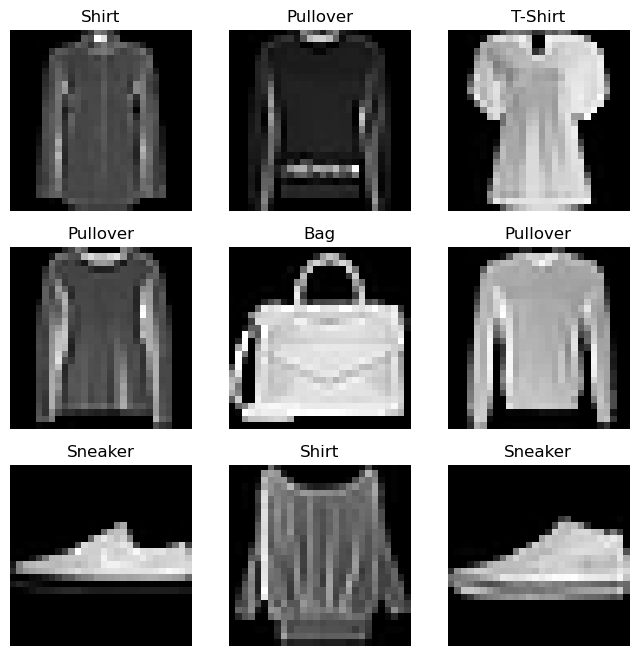

In [4]:
labels_map = { # 숫자에 해당하는 라벨을 매핑해놓은 딕셔너리
    # 숫자 = 라벨, (0~9)
    0: "T-Shirt", 
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))# figure라는 객체를 만들고, 그 크기를 8x8로 만듦
cols,rows= 3,3 # 3x3 행렬을 만듦
for i in range(1, cols*rows+1): # 1부터 9까지 반복
    # torch.randint(low, high, size) -> low부터 high까지의 숫자 중에서 size만큼의 숫자를 랜덤하게 뽑음
    # 근데 여기서는 low와 high를 안써서 0부터 len(training_data)까지의 숫자 중에서 size만큼의 숫자를 랜덤하게 뽑음
    sample_idx = torch.randint(len(training_data), size=(1,)).item()# 0부터 len(training_data)까지의 숫자 중에서 랜덤하게 1개를 뽑음
    img, label = training_data[sample_idx]# 뽑은 숫자에 해당하는 이미지와 라벨을 가져옴
    figure.add_subplot(rows, cols, i)# figure에 3x3 행렬을 만듦
    # add_subplot(rows, cols, i) -> figure에 rows x cols 행렬을 만들고, i번째에 subplot을 추가함
    # 왼쪽 위부터 오른쪽 아래로 순서대로 subplot을 추가함
    plt.title(labels_map[label])# 라벨을 title로 설정
    plt.axis("off")# axis를 없앰
    plt.imshow(img.squeeze(), cmap="gray")# 이미지를 보여줌
    # squeeze()는 차원이 1인 차원을 없애주는 역할을 함, cmap = color map -> gray로 설정

#### Creating a Custom Dataset for my files  
A custom dataset class must implement  3 funcs. : ``__init__``,``__len__``,``__getitem__`` .  
아래 코드를 보면 FashionMNIST 이미지들이 img_dir라는 디렉토리에 저장되고, 이놈들의 label이 annotations_file 이라는 csv파일에 저장됨.  


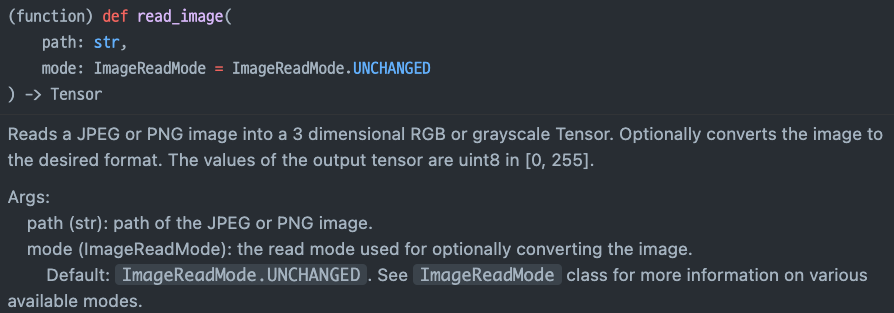

In [5]:
import os # using package names as os
import pandas as pd 
from torchvision.io import read_image # torchvision 패키지에서 io 모듈을 사용하겠다고 선언          
class CustomImageDataset(Dataset): # Dataset을 상속받는 CustomImageDataset 클래스를 만듦
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):# __init__ 메소드 -> class를 생성할때 실행되는 생성자
        # init 메소드는 객체가 생성될 때 자동으로 호출되는 메소드 -> 객체가 생성될 때 초기화를 해주는 역할을 함
        # self : 객체 자신, annotations_file : 주석 파일, img_dir : 이미지 디렉토리, transform : 변환, target_transform : 타겟 변환
        self.img_labels = pd.read_csv(annotations_file)# annotations_file을 읽어서 img_labels에 저장
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):# __len__ 메소드 -> 원소의 개수를 셀 때 쓰는 메소드
        return len(self.img_labels)# img_labels의 길이를 반환
    
    def __getitem__(self, idx):# __getitem__ 메소드 -> idx번째 원소를 가져올 때 쓰는 메소드
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])# img_dir과 img_labels의 [idx][0]번째 원소를 join해서 img_path에 저장
        # iloc[0] -> 0번째 행 추출, loc['june']-> june이라는 이름의 행 추출
        image = read_image(img_path)# img_path를 읽어서 image에 저장
        label = self.img_labels.iloc[idx, 1]# img_labels의 [idx][1]번째 원소를 label에 저장
        if self.transform:# transform이 있으면
            image = self.transform(image)# image에 transform을 적용함
            # transform은 이미지를 변환시키는 역할을 함 -> 이미지를 텐서로 바꾸거나, 크기를 바꾸거나, 회전시키거나, 뒤집거나 등등
        if self.target_transform:# target_transform이 있으면
            label = self.target_transform(label)# label에 target_transform을 적용함
        return image, label# image와 label을 반환함

##### Init  
__init__ 함수는 Dataset 객체가 생성(instantiate)될 때 한 번만 실행됩니다. 여기서는 이미지와 주석 파일(annotation_file)이 포함된 디렉토리와, 두가지 변형(transform)을 초기화합니다.  

labels.csv 파일은 다음과 같습니다:  
```
tshirt1.jpg, 0
tshirt2.jpg, 0
......
ankleboot999.jpg, 9```

#### getitem  
_getitem__ 함수는 주어진 인덱스 idx 에 해당하는 샘플을 데이터셋에서 불러오고 반환합니다.  
`인덱스를 기반`으로, 디스크에서 이미지의 위치를 식별하고, `read_image 를 사용하여 이미지를 텐서로 변환`하고, self.img_labels 의 csv 데이터로부터 해당하는 정답(label)을 가져오고, (해당하는 경우) 변형(transform) 함수들을 호출한 뒤, 텐서 이미지와 라벨을 Python 사전(dict)형으로 반환합니다.

`Dataset 은 데이터셋의 특징(feature)을 가져오고 하나의 샘플에 정답(label)을 지정하는 일을 한 번에 합니다.` 모델을 학습할 때, 일반적으로 샘플들을 《미니배치(minibatch)》로 전달하고, 매 에폭(epoch)마다 데이터를 다시 섞어서 과적합(overfit)을 막고, Python의 multiprocessing 을 사용하여 데이터 검색 속도를 높이려고 합니다.  

`DataLoader` 는 간단한 API로 이러한 복잡한 과정들을 추상화한 `순회 가능한 객체(iterable)`입니다.  

In [6]:
# iterate through the dataloader
from torch.utils.data import DataLoader
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)# training_data를 64개씩 묶어서 섞어서 train_dataloader에 저장
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)# test_data를 64개씩 묶어서 섞어서 test_dataloader에 저장
# shuffle=True -> 데이터를 섞어서 불러옴
# dataloader는 데이터를 묶어서 불러오는 역할을 함

Dataloader에 데이터셋을 불러온 뒤에는, 필요에따라 dataset을 순회(iterate)할 수 있음.  
아래 코드의 각 iteration엔 각각 batch_size=64의 특징(feature)과 정답(label)을 포함하는 train_features와 train_labels의 묶음(batch)를 반환함.  
shuffle = T니까 iterate하고 데이터가 섞임  

Feature batch shape: torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


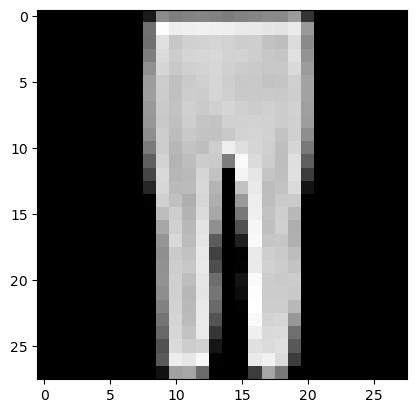

Label: 1


In [15]:
import numpy as np
train_features, train_labels = next(iter(train_dataloader))# train_dataloader에서 다음 원소를 불러옴
print(f"Feature batch shape: {train_features.size()}") # train_features의 shape을 출력
# 64개의 이미지가 있고, 각 이미지는 1x28x28의 크기를 가짐
print(np.shape(train_features)) # same as above
print(f"Labels batch shape: {train_labels.size()}")# train_labels의 shape을 출력
img = train_features[0].squeeze()# train_features의 0번째 원소를 가져와서 차원이 1인 차원을 없앰
label = train_labels[0]# train_labels의 0번째 원소를 가져옴
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}") # label을 출력

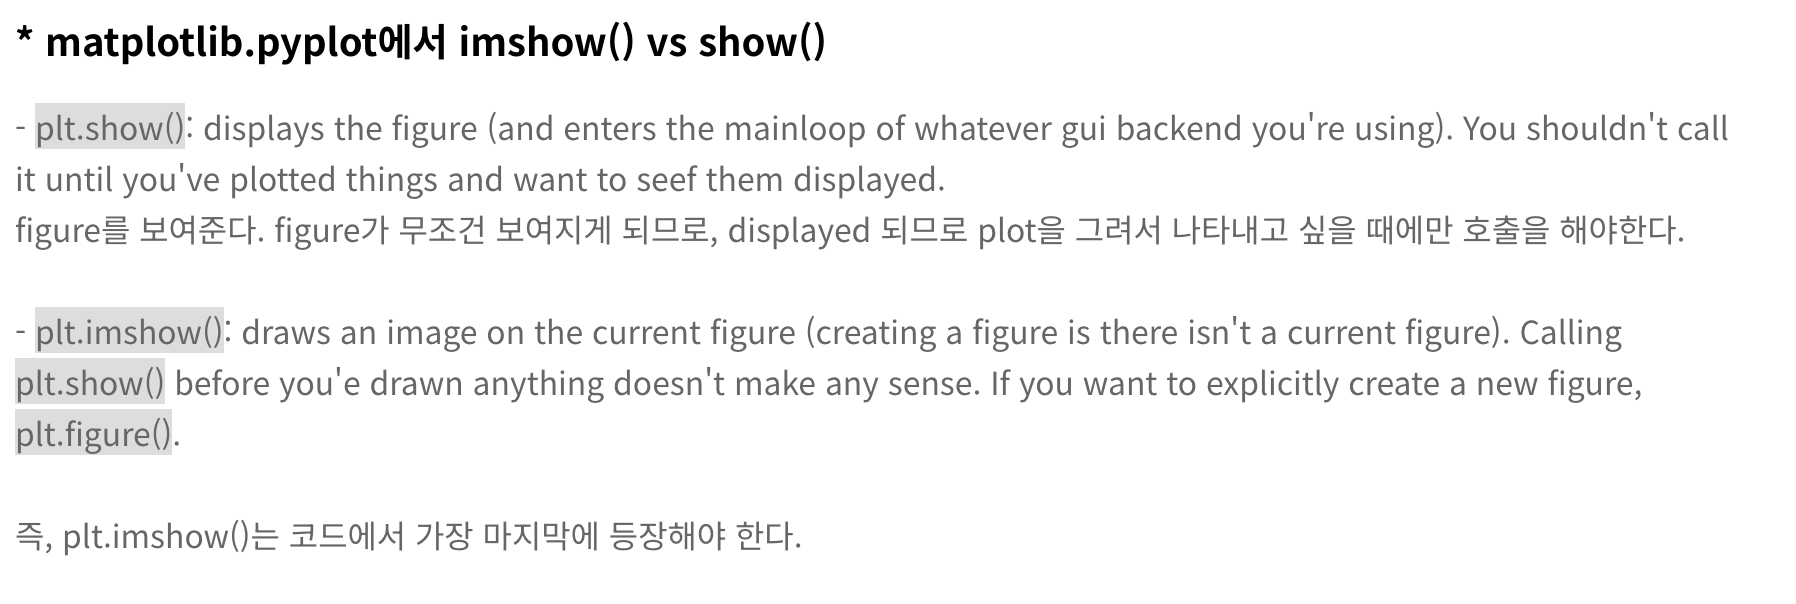